# Importing required Libraries

In [1]:
import warnings
warnings.simplefilter("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix

# EDA

In [5]:
df = pd.read_csv("Happiness.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
df.shape

(158, 12)

In [8]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Mean and Median are almost equal hence no outliers present

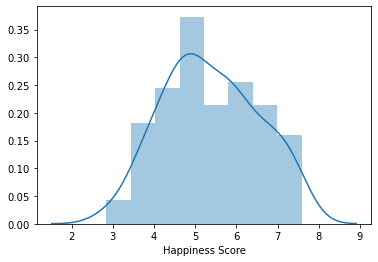

In [10]:
sns.distplot(df['Happiness Score'])

Data is normally distributed

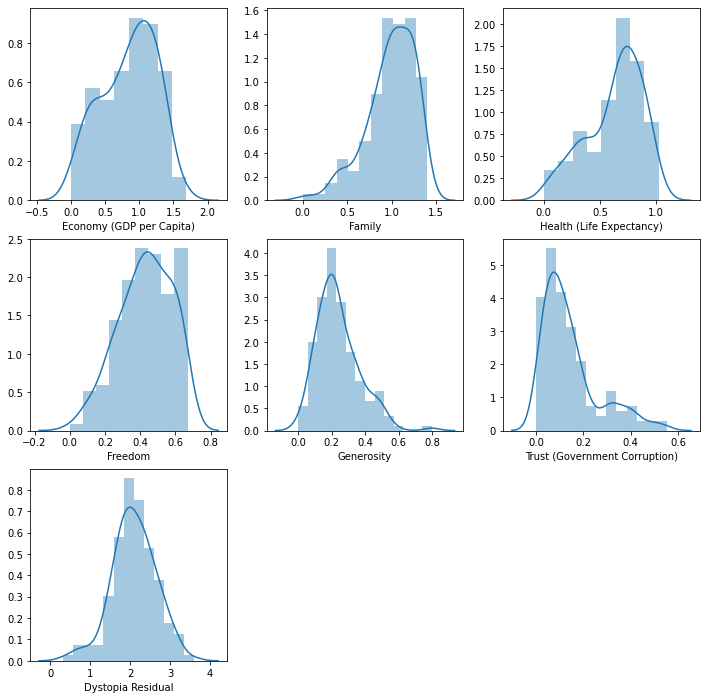

In [11]:
happiness_factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Generosity', 'Trust (Government Corruption)', 
           'Dystopia Residual']

def plot_columns_on_grid(data, columns, grid):
    for i, column in enumerate(columns):
        plt.subplot(grid[0], grid[1], i+1)
        sns.distplot(data[column])

plt.figure(figsize=(12,12))
plot_columns_on_grid(df, happiness_factors, (3, 3))

In [12]:
# building ML Model

Y = df['Happiness Score']
X = df.drop(['Happiness Score', 'Happiness Rank', 'Country', 'Region'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [13]:
print('Coefficients:',lm.coef_)

Coefficients: [-6.62640689e-04  1.00012756e+00  9.99809853e-01  9.99984279e-01
  9.99719976e-01  9.99885249e-01  9.99747287e-01  9.99955045e-01]


In [14]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

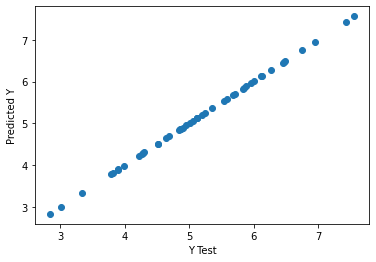

In [15]:

plt.scatter(Y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [16]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))


Mean Absolute Error: 0.00026861910100867137
Mean Squared Error: 9.548227095644384e-08
Root Mean Squared Error: 0.0003090020565569813


In [17]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Standard Error,-0.000663
Economy (GDP per Capita),1.000128
Family,0.999810
Health (Life Expectancy),0.999984
Freedom,0.999720
Trust (Government Corruption),0.999885
Generosity,0.999747
Dystopia Residual,0.999955


we can observe that happiness score is linear in nature with respect to the coefficients

# Heatmap

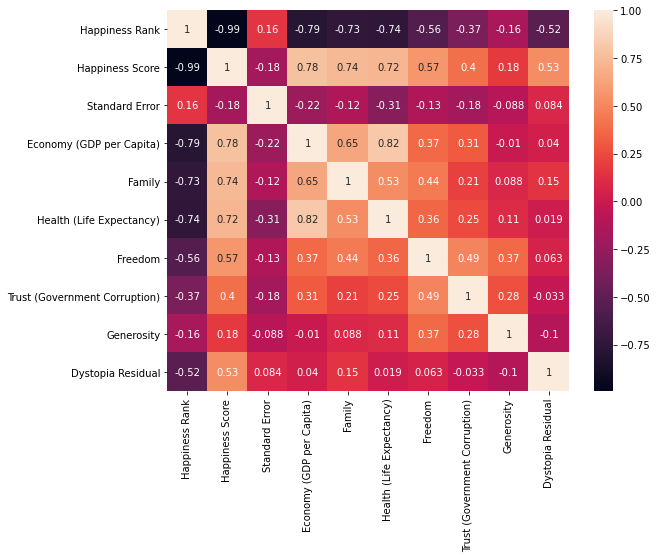

In [19]:
correlation_mat = df.corr()
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(correlation_mat, annot = True)

In [20]:
region = df.groupby('Region')

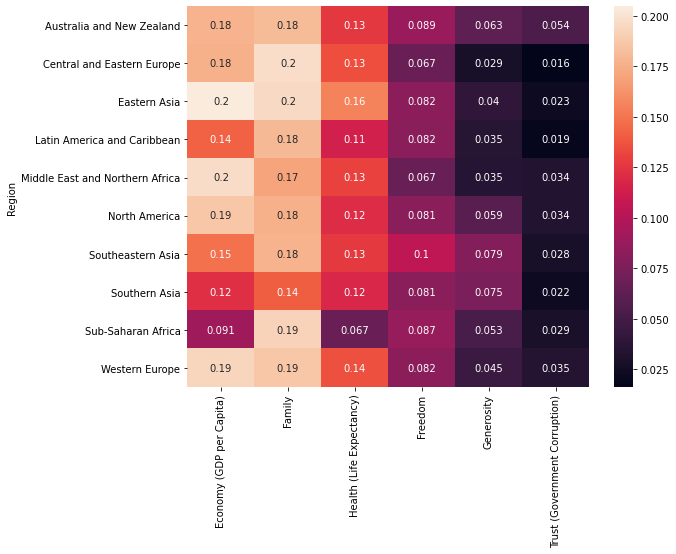

In [26]:
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(region[happiness_factors[:-1]].mean().div(region['Happiness Score'].mean(), axis='index'), annot = True)

# Scatter Plot of Happiness Score Vs Other Factors

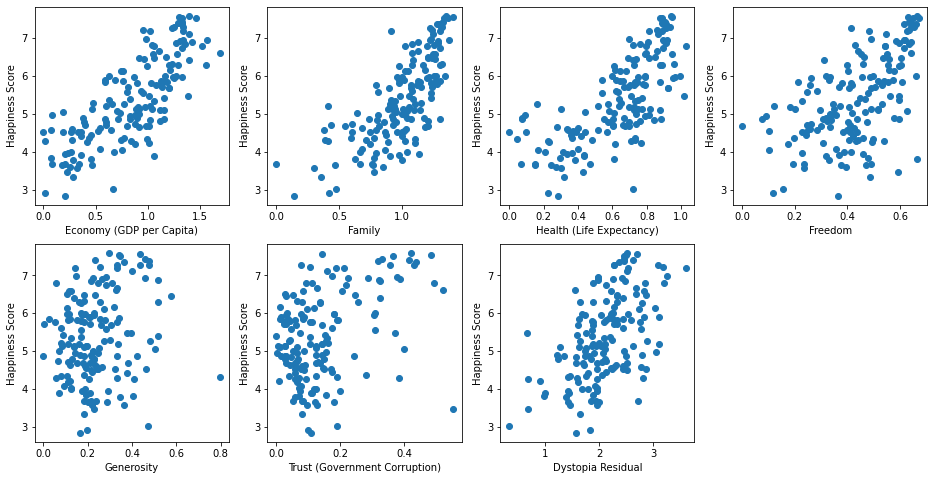

In [27]:
happiness_factors = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
           'Freedom', 'Generosity', 'Trust (Government Corruption)', 
           'Dystopia Residual']

def plot(data, columns, grid):
    for i, column in enumerate(columns):
        plt.subplot(grid[0], grid[1], i+1)
        plt.scatter(data[column],df['Happiness Score'])
        plt.xlabel(column);
        plt.ylabel('Happiness Score');

plt.figure(figsize=(16,8))
plot(df, happiness_factors, (2, 4))


# Happiness Over Region

In [28]:
region[['Happiness Score'] + happiness_factors].mean().sort_values(by='Happiness Score', ascending=False)


,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
Region,,,,,,,,
Australia and New Zealand,7.285000,1.291880,1.314450,0.919965,0.645310,0.455315,0.392795,2.265355
North America,7.273000,1.360400,1.284860,0.883710,0.589505,0.429580,0.244235,2.480935
Western Europe,6.689619,1.298596,1.247302,0.909148,0.549926,0.302109,0.231463,2.151185
Latin America and Caribbean,6.144682,0.876815,1.104720,0.703870,0.501740,0.217788,0.117172,2.622577
Eastern Asia,5.626167,1.151780,1.099427,0.877388,0.462490,0.225885,0.127695,1.681607
Middle East and Northern Africa,5.406900,1.066973,0.920490,0.705616,0.361751,0.190375,0.181702,1.980009
Central and Eastern Europe,5.332931,0.942438,1.053042,0.718774,0.358269,0.152264,0.086674,2.021400
Southeastern Asia,5.317444,0.789054,0.940468,0.677357,0.557104,0.419261,0.151276,1.783020
Southern Asia,4.580857,0.560486,0.645321,0.540830,0.373337,0.341429,0.102536,2.016769
